In [58]:
# Load libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


In [59]:
# Load data into Python
APPENC01 = pd.read_excel("C:\\Users\\kwame\\OneDrive\\Desktop\\1.45.xlsx", header=None)

# Rename columns for convenience
APPENC01.columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12"]

# Create informative labels for geographic region
APPENC01["LOS"] = APPENC01["V2"]
APPENC01["InfRisk"] = APPENC01["V4"]
APPENC01["GEO"] = APPENC01["V9"]

# Map numeric levels to informative labels
level_to_label = {1: "NE", 2: "NC", 3: "S", 4: "W"}
APPENC01["GEO"] = APPENC01["GEO"].map(level_to_label)

In [60]:
# Fit linear regression models by region
regions = ["NE", "NC", "S", "W"]
regression_models = {}

for region in regions:
    subset_data = APPENC01[APPENC01["GEO"] == region]
    model = sm.OLS(subset_data["LOS"], sm.add_constant(subset_data["InfRisk"])).fit()
    regression_models[region] = model

for region, model in regression_models.items():
    print(f"Region: {region}")
    print(model.summary())
    print("\n")

Region: NE
                            OLS Regression Results                            
Dep. Variable:                    LOS   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     18.20
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           0.000233
Time:                        01:23:25   Log-Likelihood:                -59.285
No. Observations:                  28   AIC:                             122.6
Df Residuals:                      26   BIC:                             125.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5379      1.585      2.8

C:\Users\kwame\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


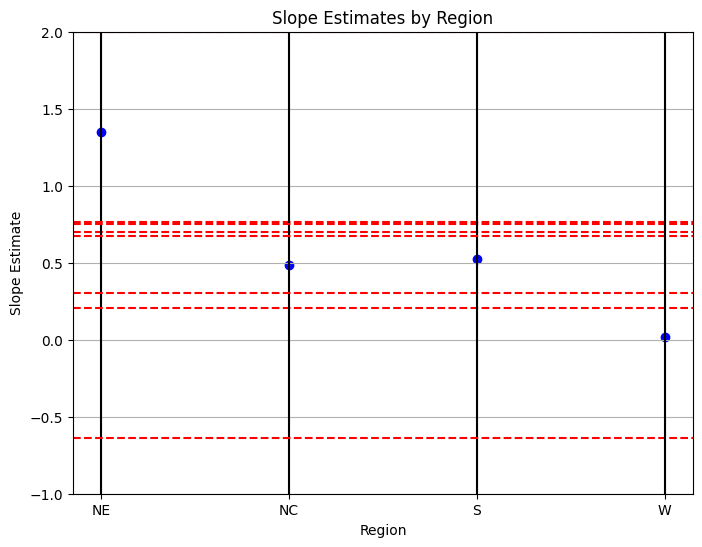

In [61]:
# Create a plot for slope estimates by region
slope_estimates = [model.params["InfRisk"] for model in regression_models.values()]
x_values = range(1, len(regions) + 1)

plt.figure(figsize=(8, 6))
plt.scatter(x_values, slope_estimates, marker='o', color='b', label="Slope Estimate")
plt.xlabel("Region")
plt.ylabel("Slope Estimate")
plt.title("Slope Estimates by Region")
plt.xticks(x_values, regions)
plt.ylim(-1, 2)
plt.yticks(np.arange(-1, 2.1, 0.5))

for i, region in enumerate(regions):
    interval = confidence_intervals[region]
    plt.axhline(y=interval[0], color='r', linestyle='--')
    plt.axhline(y=interval[1], color='r', linestyle='--')
    plt.axvline(x=i + 1, color='k')

plt.grid(True)

Slope estimates for all regions seems to be postive values. Also it can be seen that in order of magnitude, North East is first, followed by South, North Central, then West.

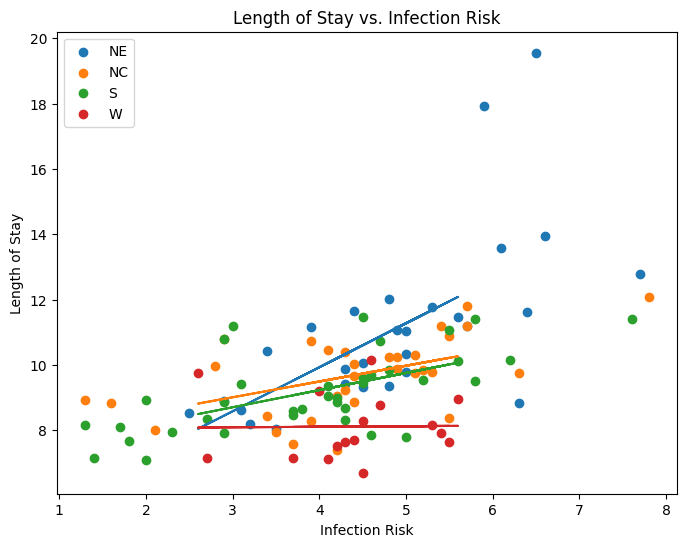

In [62]:
# Create a plot for LOS vs. InfRisk by region
plt.figure(figsize=(8, 6))
for region in regions:
    data = APPENC01[APPENC01["GEO"] == region]
    plt.scatter(data["InfRisk"], data["LOS"], label=region, marker='o')

for i, model in enumerate(regression_models.values()):
    plt.plot(data["InfRisk"], model.predict(sm.add_constant(data["InfRisk"])))

plt.xlabel("Infection Risk")
plt.ylabel("Length of Stay")
plt.title("Length of Stay vs. Infection Risk")
plt.legend(loc="upper left")

plt.show()

North Central and South Regions appear to be similar, whiles Northeast has the highest and West the lowest associations, respectively.